<a href="https://colab.research.google.com/github/AaronGaribay/datacademy2021/blob/main/calculo-basico/5_Descenso_del_gradiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dependencias

In [18]:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

## Grafica en 3d de la funcion

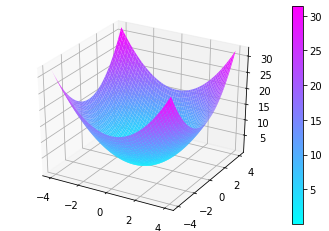

In [4]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

def f(x,y):
    return x ** 2 + y ** 2

res = 100
x = np.linspace(-4.0, 4.0, num=res)
y = np.linspace(-4.0, 4.0, num=res)

x, y = np.meshgrid(x, y)

z = f(x, y)

surf = ax.plot_surface(x, y, z, cmap=cm.cool)
fig.colorbar(surf)

## Descenso del gradiente

[ 0.24593151 -0.36091467]


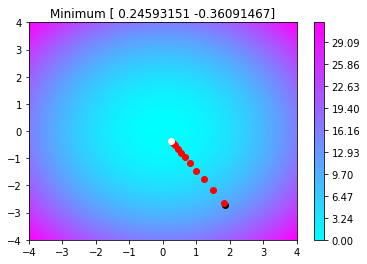

In [21]:
h = 0.001
def derivate(p_plus_h, p):
    return (f(p_plus_h[0], p_plus_h[1]) - f(p[0], p[1])) / h

def gradient(p):
    grad = np.zeros(2)
    for i, val in enumerate(p):
        p_plus_h = np.copy(p)
        p_plus_h[i] = p_plus_h[i] + h

        dp = derivate(p_plus_h, p)
        grad[i] = dp
    return grad

level_map = np.linspace(np.min(z), np.max(z), num=res)
plt.contourf(x, y, z, levels=level_map, cmap=cm.cool)
plt.colorbar()


p = np.random.rand(2) * 8 - 4
plt.plot(p[0], p[1], 'o', c='k')

lr = 0.01
for i in range(100):
    p = p - lr * gradient(p)
    if i % 10 == 0:
        plt.plot(p[0], p[1], 'o', c='r')

plt.plot(p[0], p[1], 'o', c='w')
plt.title("Minimum " + str(p))
print(p)